In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import random
from scipy.optimize import curve_fit
import math
from tqdm import tqdm

In [63]:
M_list = np.loadtxt('M.txt', dtype = float)
M_list = M_list.tolist()

Chi_list = np.loadtxt('chi.txt',dtype = float)
Chi_list = Chi_list.tolist()

E_list = np.loadtxt('E.txt',dtype = float)
E_list = E_list.tolist()

Cv_list = np.loadtxt('cv.txt', dtype = float)
Cv_list = Cv_list.tolist()

S0SR_list = pd.read_hdf("s0sr_data.h5",key = 'data')

In [64]:
S0SR_list

,0,1,2,3,4,5,6,7,8,9,...,987,988,989,990,991,992,993,994,995,996
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,"[1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, ...","[1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, ...","[1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, ...","[1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, ...","[1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, ...","[1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, ...","[1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, ...","[1, 1, 1, -1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -...","[1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1...","[1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1,...",...,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 

In [65]:
T = [0.5,1.0,2.0,3.0,3.5,4.0,4.1,4.2,4.3,4.4,4.5,4.6,4.8,5.0,5.2,5.4,5.6,5.8,6.0,6.2,6.4,6.6,6.8,7.0,8.0,9.0]

In [66]:
T[Chi_list.index(max(Chi_list))]

4.3

In [67]:
T[Cv_list.index(max(Cv_list))]

4.3

In [68]:
M_list

[1.0,
 0.9999879638916737,
 0.9945651955867633,
 0.9396737713139399,
 0.8711599799398202,
 0.6967362086258772,
 0.6390722166499497,
 0.5747048645937809,
 0.44069658976930776,
 0.38056720160481466,
 0.15554939819458374,
 0.06735682046138418,
 0.033918254764292874,
 0.028867352056168482,
 0.01803335005015044,
 0.01894984954864595,
 0.015539117352056172,
 0.011091023069207628,
 0.016168004012036108,
 0.020602056168505533,
 0.019715897693079226,
 0.008212637913741225,
 0.024968154463390176,
 0.012656469408224692,
 0.009064694082246751,
 0.013276078234704104]

In [69]:
T[10]

4.5

In [70]:
(4.3+4.3+4.5)/3

4.366666666666666

## Fit Magnetization Function

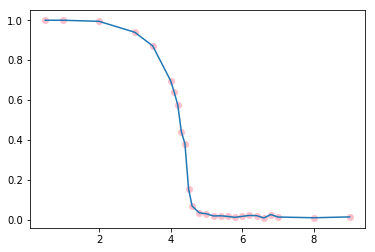

In [71]:
plt.plot(T, M_list,'o',color = 'pink')#color = 'pink'
plt.plot(T, M_list)
plt.show()

In [72]:
LnM_list = []
for i in M_list:
    LnM_list.append(np.log(i))
    
Ln_t = []
for i in T:
    Ln_t.append(np.log(4.3666-i))
    

/Users/chenwu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [73]:
LnM_list

[0.0,
 -1.2036180760873986e-05,
 -0.0054496266912565025,
 -0.06222251574817933,
 -0.1379296451267046,
 -0.3613484066790919,
 -0.44773781588868494,
 -0.5538986489248661,
 -0.8193986453776422,
 -0.9660925033331084,
 -1.8607919245332543,
 -2.6977511123387243,
 -3.3838019209064942,
 -3.5450440090784423,
 -4.0155324548028375,
 -3.965959286870657,
 -4.164394734107713,
 -4.501619230368221,
 -4.124721050734132,
 -3.882364394162565,
 -3.9263299791827375,
 -4.802081102162795,
 -3.6901540875785264,
 -4.369586778867096,
 -4.703368182476954,
 -4.321791492199312]

In [74]:
Ln_t

[1.3523755679162646,
 1.2139033330028444,
 0.8614543259683214,
 0.3123259033645409,
 -0.14317776967632798,
 -1.0034839435765324,
 -1.3220058712375273,
 -1.7921595492493956,
 -2.7090507014357903,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [75]:
# def func(T,Tc,A,exponent,b):
#     return np.piecewise(T, [T < Tc, T >= Tc],[lambda y:A*(Tc-T)**exponent+b, lambda y:0])
def m(T,Tc,A,exponent):
    return A*(abs(Tc-T))**(exponent)

# log(m) = beta*log(t)+log(A)
def log_of_m(t, A, beta):
    return beta*t + A

In [76]:
popt,pcov = curve_fit(log_of_m,Ln_t[3:9],LnM_list[3:9],p0 = np.array([5,0.5]),
                      bounds = (0,[np.inf,np.inf])
                      ,maxfev = 10000)

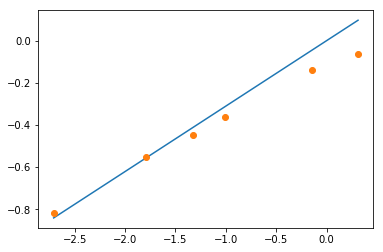

In [77]:
#popt = np.array([5, 0.1, 0.3])
plt.plot(Ln_t[3:9], log_of_m(np.array(Ln_t[3:9]),*popt))
plt.plot(Ln_t[3:9], LnM_list[3:9],'o')
#plt.xlim(0,2)

plt.show()

In [78]:
popt

array([3.12557295e-09, 3.10447769e-01])

In [79]:
mag,mag_dev = curve_fit(m,T[2:12],M_list[2:12],p0 = np.array([4.36666666,np.exp(popt[0]),popt[1]]),
                      bounds = (0,[np.inf,np.inf,0.32]),maxfev = 100000)

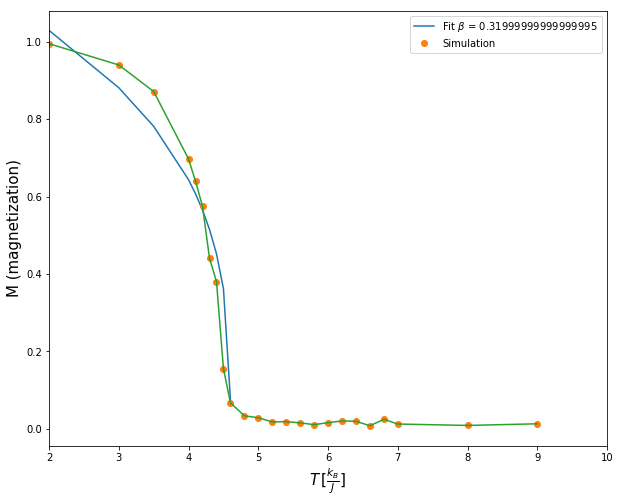

In [80]:
plt.figure(figsize=(10,8))
plt.plot(T[2:12], m(np.array(T[2:12]),*mag),label='Fit $\\beta$ = '+str(mag[2]))
plt.plot(T[2:], M_list[2:],'o', label = 'Simulation')
plt.plot(T[2:], M_list[2:])
plt.xlim(2,10)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel('M (magnetization)',fontsize=15)
plt.legend()
plt.show()

In [81]:
_beta = mag[2]
_beta

0.31999999999999995

In [82]:
_Tc1 = mag[0]
_Tc1

4.599250768258192

## Fit Susceptibility

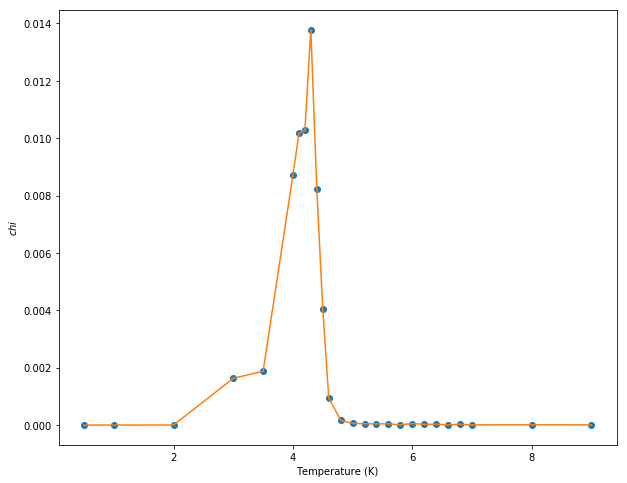

In [83]:
plt.figure(figsize=(10,8))
plt.plot(T, Chi_list,'o')#color = 'pink'
plt.plot(T, Chi_list)
plt.xlabel("Temperature (K)")
plt.ylabel ("$chi$")
plt.show()

In [84]:
# def func(T,Tc,A,exponent,b):
#     return np.piecewise(T, [T < Tc, T >= Tc],[lambda y:A*(Tc-T)**exponent+b, lambda y:0])
def chi(T,Tc,A,gamma,b):
    return A*(abs(Tc-T))**(-gamma)-b

In [85]:
suscp,suscp_dev = curve_fit(chi,T[0:7],Chi_list[0:7],p0 = np.array([4.4,0.5,1.24,0.00001]),
                      bounds = (0,[4.525,np.inf,1.24,np.inf]),maxfev = 100000)

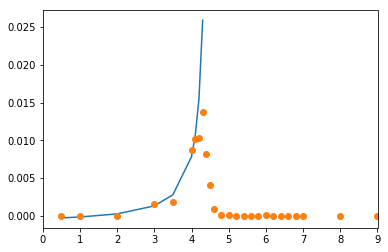

In [86]:
#popt1=np.array([4.36666,0.01,0.3,0.0001])
plt.plot(T[0:9], chi(np.array(T[0:9]),*suscp))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(0,9)
plt.show()

In [87]:
suscm,suscm_dev = curve_fit(chi,T[8:],Chi_list[8:],p0 = np.array([4.1,0.5,1.25,0.00001]),
                      bounds = ([4.0,0,0,0],[4.5,np.inf,1.5,np.inf]),maxfev = 100000)

In [88]:
suscm

array([4.14046668e+00, 9.32021659e-04, 1.50000000e+00, 4.83232400e-04])

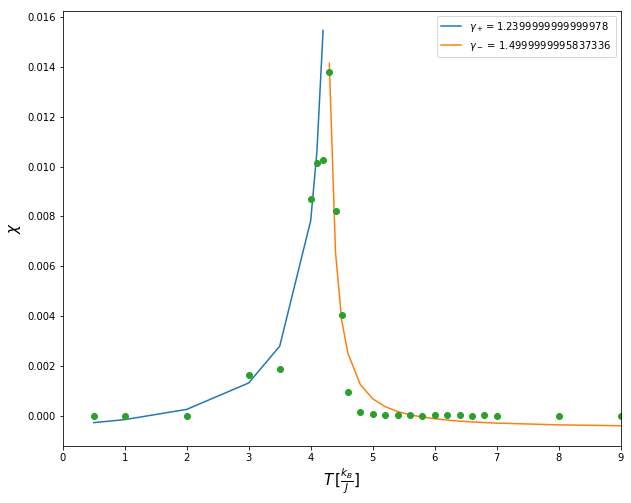

In [89]:
plt.figure(figsize=(10,8))
plt.plot(T[0:8], chi(np.array(T[0:8]),*suscp),label = '$\gamma_+ = $'+str(suscp[-2]))
plt.plot(T[8:], chi(np.array(T[8:]),*suscm),label = '$\gamma_-$ = '+str(suscm[-2]))
plt.plot(T[0:], Chi_list[0:],'o')
plt.xlim(0,9)
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel ("$\chi$",fontsize = 15)
plt.legend()
plt.show()

In [90]:
_gammap = suscp[-2]
_gammam = suscm[-2]

_gamma = (_gammap+_gammam)/2
_gamma

1.3699999997918657

In [91]:
_Tc2 = (suscm[0]+suscp[0])/2
_Tc2

4.3226819498406766

In [92]:
# gamma+ = 1.2399999999999978, gamma- = 1.239999999999962

## Heat Capacity Fit

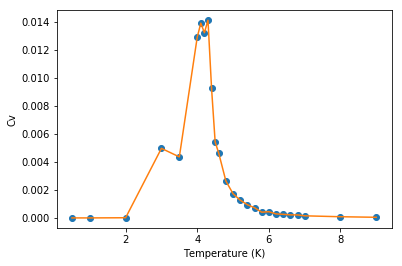

In [93]:
plt.plot(T, Cv_list,'o')#color = 'pink'
plt.plot(T, Cv_list)
plt.xlabel("Temperature (K)")
plt.ylabel ("Cv")
plt.show()

In [94]:
def cv(T,Tc,A,alpha,b):
    return A*(abs(Tc-T))**(-alpha)-b

In [95]:
heatcap,heatcap_dev = curve_fit(cv,T[9:],Cv_list[9:],p0 = np.array([4.11,0.5,0.0,0.00001]),
                      bounds = (0,[np.inf,np.inf,np.inf,np.inf]),maxfev = 100000)

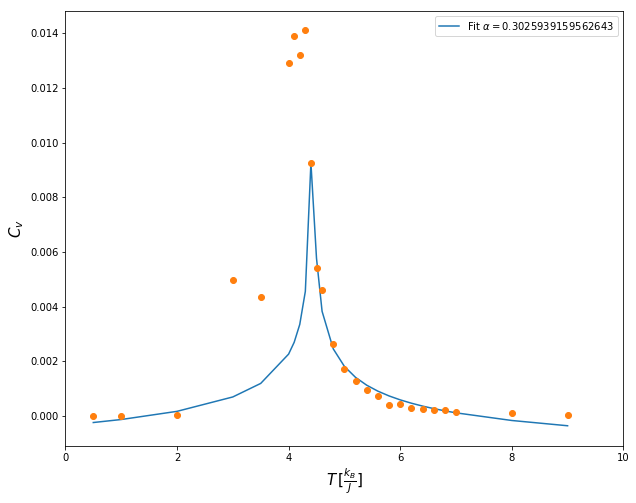

In [96]:
plt.figure(figsize=(10,8))
plt.plot(T[0:], cv(np.array(T[0:]),*heatcap), label = 'Fit $\\alpha = $'+str(heatcap[-2]))
plt.plot(T[0:], Cv_list[0:],'o')
plt.xlabel('$T \\, [\\frac{k_B}{J}]$',fontsize=15)
plt.ylabel ("$C_v$",fontsize = 15)
plt.xlim(0,10)
plt.legend()
plt.show()

In [97]:
heatcap

array([4.42452731e+00, 3.94503853e-03, 3.02593916e-01, 2.85478198e-03])

In [98]:
_alpha = heatcap[2]
_alpha

0.3025939159562643

In [99]:
_Tc3 = heatcap[0]
_Tc3

4.424527305101592

In [100]:
Ave_Tc = (_Tc1+_Tc2+_Tc3)/3
Ave_Tc

4.448820007733487

In [101]:
T[9]

4.4

## Fit Correlation Function

In [102]:
S0SR_list[960][16]

[1, -1, -1, -1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1]

In [126]:
G_T = []
for t in range(len(T)):
    G = []
    double=0
    single1=0
    single2=0
    for r in range(1,11):
        double = 0
        single1 =0
        single2 =0
        for nstep in range(0,996):
            double+=S0SR_list[nstep][t][r]
            #single1+=S0[n][i]
            #single2+=S0[n][i]
        #G.append(double/len(S0SR)-(single1/len(S0))*(single2/len(SR)))
        G.append(abs(double/996))
        
    G_T.append(G)

In [128]:
def Corr(r,eta):
    return r**(-3+2-eta)

eps,eps_div = curve_fit(Corr,np.array(range(1,11)),np.array(G_T[9]), maxfev = 10000)

eta = eps[0]
nv = _gamma/(2-eta)
nv

0.6610097432926642

In [129]:
eta

-0.07258669587460793